In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

In [3]:
ruta = 'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv'

In [3]:
df = pd.read_csv(ruta)

In [4]:
df.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
gender,15547,2,F,7776,M,7771
month,15547,12,3,1310,2,1240
day,15067,32,27,480,99,350
year,15547,40,1969,768,2001,24
births,15547,3137,2,95,6474,1


In [5]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
df.sort_values(by='year').tail()

,year,month,day,gender,births
15524,2008,1,NaN,M,182789
15523,2008,1,NaN,F,174255
15545,2008,12,NaN,F,173215
15533,2008,6,NaN,F,169958
15546,2008,12,NaN,M,181235


In [7]:
df[['year','month','day']] = df[['year','month','day']].apply(lambda x: x.astype(str))

In [8]:
df.dtypes

year      object
month     object
day       object
gender    object
births     int64
dtype: object

In [4]:
df = (pd.read_csv(ruta)
    .assign(date = lambda x: pd.to_datetime(x[['year', 'month', 'day']], errors='coerce'))
    .dropna(subset=['date'])
    .set_index(['date'])
    .sort_index()
    .drop(['year', 'month', 'day'], axis=1)
)
df

,gender,births
date,,
1969-01-01,F,4046
1969-01-01,M,4440
1969-01-02,F,4454
1969-01-02,M,4548
1969-01-03,F,4548
...,...,...
1988-12-29,M,5944
1988-12-30,F,5742
1988-12-30,M,6095


In [10]:
idx = pd.IndexSlice
df.loc[idx['F', '1972'],:].sum()

KeyError: "None of [Index(['1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972',\n       '1972',\n       ...\n       '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972',\n       '1972'],\n      dtype='object', name='date', length=14610)] are in the [index]"

In [11]:
df.groupby(['gender', pd.Grouper(level=1, freq='Y')]).sum().unstack(level=0).plot();

ValueError: The level 1 is not valid

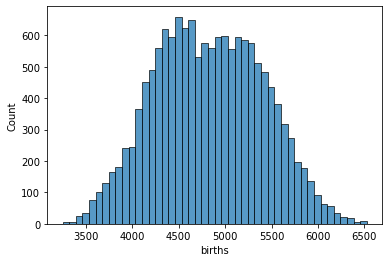

In [12]:
g = sns.histplot(df.births)

In [13]:
df.unstack(level=0).resample('Y').sum()
df.index.get_level_values('date')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

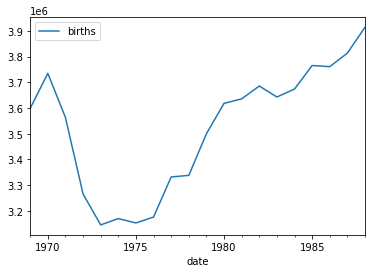

In [6]:
salida=df
salida.resample('Y').sum().plot();